In [111]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette='pastel')
import numpy as np
from sklearn.neighbors import KNeighborsRegressor, KernelDensity, RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

## Import Data

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [41]:
loc_train = train[['lat', 'long']]
loc_test = test[['lat', 'long']]
price_train = train['price']
price_test = test['price']
sqftPrice_train = train['price'] / train['sqft_living']
sqftPrice_test = test['price'] / test['sqft_living']

In [42]:
price_train.shape, price_test.shape, loc_train.shape, loc_test.shape, sqftPrice_train.shape, sqftPrice_test.shape

((20000,), (1613,), (20000, 2), (1613, 2), (20000,), (1613,))

## KNN predicting overall price

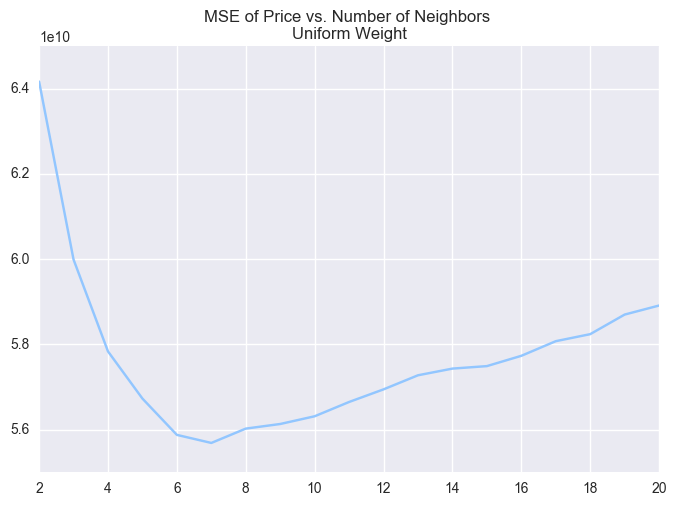

In [65]:
n_list = range(2, 21)
mse_list = []
for n in n_list:
    m = KNeighborsRegressor(n_neighbors=n)
    mse_list.append(-np.mean(cross_val_score(m, loc_train, price_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')))
plt.plot(n_list, mse_list)
plt.title('MSE of Price vs. Number of Neighbors \nUniform Weight')

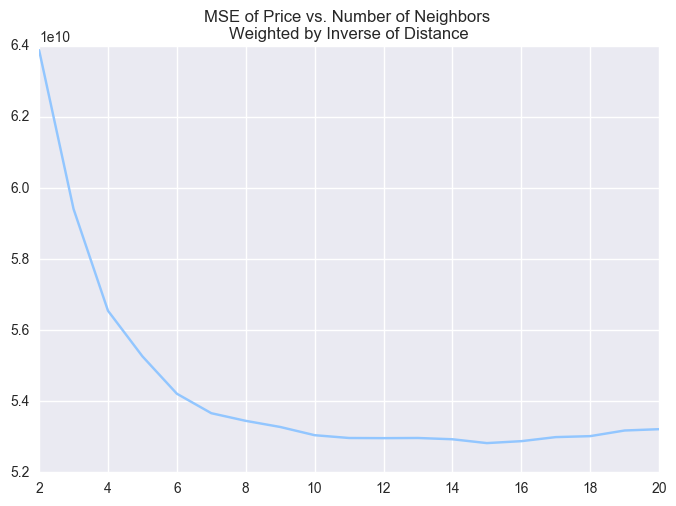

In [66]:
n_list = range(2, 21)
mse_list = []
for n in n_list:
    m = KNeighborsRegressor(n_neighbors=n, weights='distance')
    mse_list.append(-np.mean(cross_val_score(m, loc_train, price_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')))
plt.plot(n_list, mse_list)
plt.title('MSE of Price vs. Number of Neighbors \nWeighted by Inverse of Distance')

In [67]:
m = KNeighborsRegressor(n_neighbors=15, weights='distance')
m.fit(loc_train, price_train)
price_pred = m.predict(loc_test)
print 'Test RMSE of Sales Price: %d' % np.sqrt(mean_squared_error(price_test, price_pred))
print 'Average Test Error: %.3f' % np.mean(np.true_divide(abs(price_test - price_pred), price_test))

Test RMSE of Sales Price: 240457
Average Test Error: 0.218


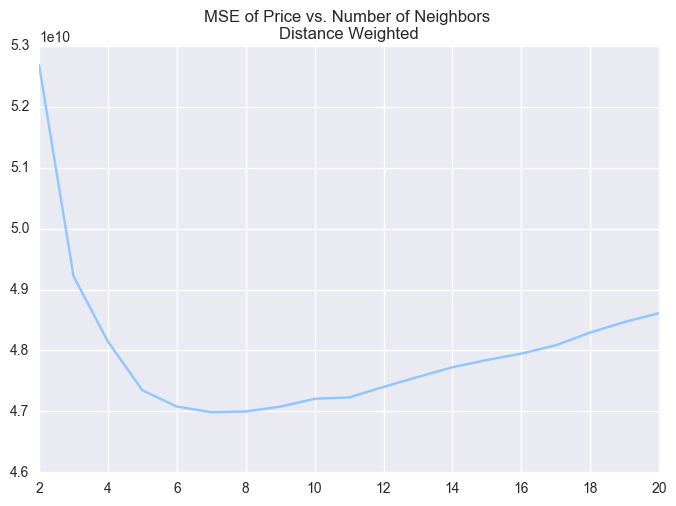

In [93]:
n_list = range(2, 21)
mse_list = []
knn_train = train[['sqft_living', 'lat', 'long', 'waterfront']]
for n in n_list:
    m = KNeighborsRegressor(n_neighbors=n, weights='distance')
    mse_list.append(-np.mean(cross_val_score(m, knn_train, price_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')))
plt.plot(n_list, mse_list)
plt.title('MSE of Price vs. Number of Neighbors \nDistance Weighted')

In [94]:
m = KNeighborsRegressor(n_neighbors=7, weights='distance')
knn_train = train[['sqft_living', 'lat', 'long', 'waterfront']]
knn_test = test[['sqft_living', 'lat', 'long', 'waterfront']]
m.fit(knn_train, price_train)
price_pred = m.predict(knn_test)
print 'Test RMSE of Sales Price: %d' % np.sqrt(mean_squared_error(price_test, price_pred))
print 'Average Test Error: %.3f' % np.mean(np.true_divide(abs(price_test - price_pred), price_test))

Test RMSE of Sales Price: 217670
Average Test Error: 0.209


## KNN predicting price per sqft

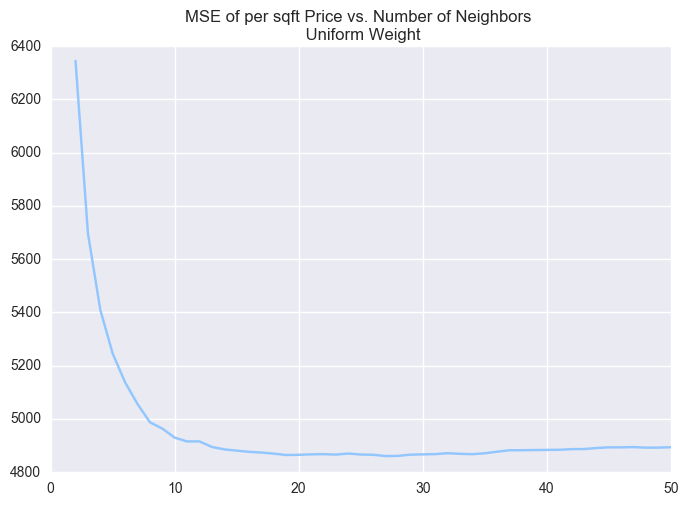

In [63]:
n_list = range(2, 51)
mse_list = []
for n in n_list:
    m = KNeighborsRegressor(n_neighbors=n)
    mse_list.append(-np.mean(cross_val_score(m, loc_train, sqftPrice_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')))
plt.plot(n_list, mse_list)
plt.title('MSE of per sqft Price vs. Number of Neighbors \n Uniform Weight')

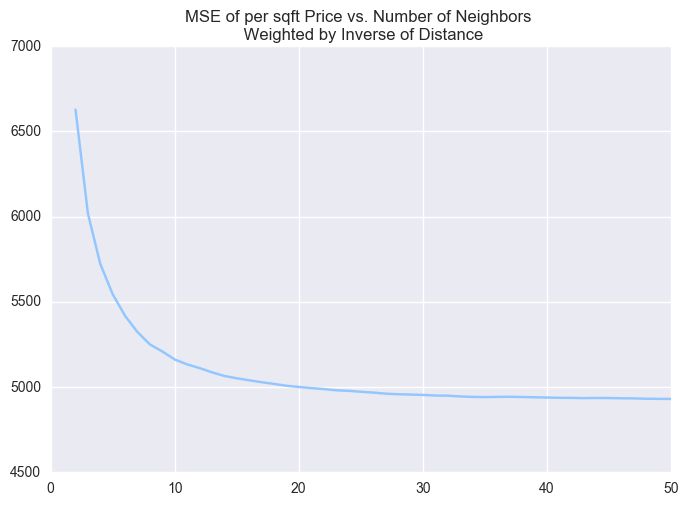

In [64]:
n_list = range(2, 51)
mse_list = []
for n in n_list:
    m = KNeighborsRegressor(n_neighbors=n, weights='distance')
    mse_list.append(-np.mean(cross_val_score(m, loc_train, sqftPrice_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')))
plt.plot(n_list, mse_list)
plt.title('MSE of per sqft Price vs. Number of Neighbors \n Weighted by Inverse of Distance')

In [76]:
m = KNeighborsRegressor(n_neighbors=20)
m.fit(loc_train, sqftPrice_train)
sqftPrice_pred = m.predict(loc_test)
price_pred = sqftPrice_pred * test['sqft_living']
print 'Test RMSE of Sales Price: %d' % np.sqrt(mean_squared_error(price_test, price_pred))
print 'Average Test Error: %.3f' % np.mean(np.true_divide(abs(price_test - price_pred), price_test))

Test RMSE of Sales Price: 169611
Average Test Error: 0.190


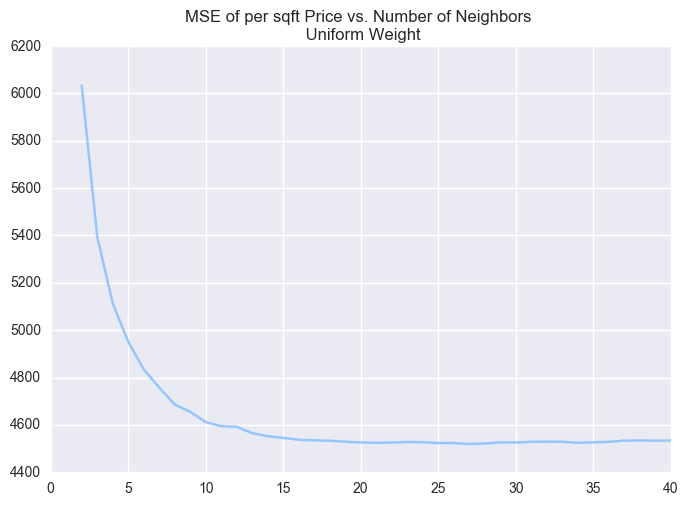

In [105]:
n_list = range(2, 41)
mse_list = []
knn_train = train[['lat', 'long', 'waterfront']]
for n in n_list:
    m = KNeighborsRegressor(n_neighbors=n)
    mse_list.append(-np.mean(cross_val_score(m, knn_train, sqftPrice_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')))
plt.plot(n_list, mse_list)
plt.title('MSE of per sqft Price vs. Number of Neighbors \n Uniform Weight')

In [106]:
m = KNeighborsRegressor(n_neighbors=12)
knn_train = train[['lat', 'long', 'waterfront']]
knn_test = test[['lat', 'long', 'waterfront']]
m.fit(knn_train, sqftPrice_train)
sqftPrice_pred = m.predict(knn_test)
price_pred = sqftPrice_pred * test['sqft_living']
print 'Test RMSE of Sales Price: %d' % np.sqrt(mean_squared_error(price_test, price_pred))
print 'Average Test Error: %.3f' % np.mean(np.true_divide(abs(price_test - price_pred), price_test))

Test RMSE of Sales Price: 146755
Average Test Error: 0.187
